<a href="https://colab.research.google.com/github/Mathushaharan/Image_Classification_Using_CNN/blob/main/Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import  datasets, layers, models
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report

Load dataset

In [6]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
Y_train = Y_train.reshape(-1,)  #Reshaping the array
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Viewing some image data

In [10]:
classes = ["airplane", "automobile", "bird", "cat" , "deer", "dog", "frog", "horse", "ship", "truck"]

def plot_samples(x,y,i):
  plt.figure(figsize= (15,2)) #width and height
  plt.imshow(x[i])
  plt.xlabel(classes[y[i]])

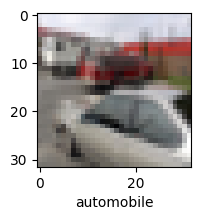

In [11]:
plot_samples(X_train, Y_train , 49999)

Normalizing the data

In [12]:
X_train = X_train / 255
X_test = X_test / 255
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [13]:
opt = tf.keras.optimizers.Adam(0.001) #learning rate is 0.001

In [14]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    Dropout(0.5),
    layers.Dense(64, activation = 'relu'),
    Dropout(0.5),
    layers.Dense(32, activation = 'relu'),
    Dropout(0.5),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

##Implementing early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model_history = cnn.fit(X_train, Y_train, epochs = 1000, validation_split = 0.3, batch_size = 30, callbacks = early_stop)

Epoch 1/1000
1167/1167 [==============================] - 20s 7ms/step - loss: 2.0620 - accuracy: 0.1910 - val_loss: 1.7970 - val_accuracy: 0.3142
Epoch 2/1000
1167/1167 [==============================] - 7s 6ms/step - loss: 1.7915 - accuracy: 0.3025 - val_loss: 1.6035 - val_accuracy: 0.3763
Epoch 3/1000
1167/1167 [==============================] - 7s 6ms/step - loss: 1.6457 - accuracy: 0.3777 - val_loss: 1.4374 - val_accuracy: 0.4668
Epoch 4/1000
1167/1167 [==============================] - 7s 6ms/step - loss: 1.5332 - accuracy: 0.4281 - val_loss: 1.3769 - val_accuracy: 0.4843
Epoch 5/1000
1167/1167 [==============================] - 7s 6ms/step - loss: 1.4618 - accuracy: 0.4580 - val_loss: 1.3667 - val_accuracy: 0.4889
Epoch 6/1000
1167/1167 [==============================] - 7s 6ms/step - loss: 1.4049 - accuracy: 0.4815 - val_loss: 1.3386 - val_accuracy: 0.5041
Epoch 7/1000
1167/1167 [==============================] - 7s 6ms/step - loss: 1.3641 - accuracy: 0.5001 - val_loss: 1.2841 

In [15]:
Y_test = Y_test.reshape(-1,)
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2391 - accuracy: 0.6635


[1.239113211631775, 0.6635000109672546]

Summarize history for accuracy

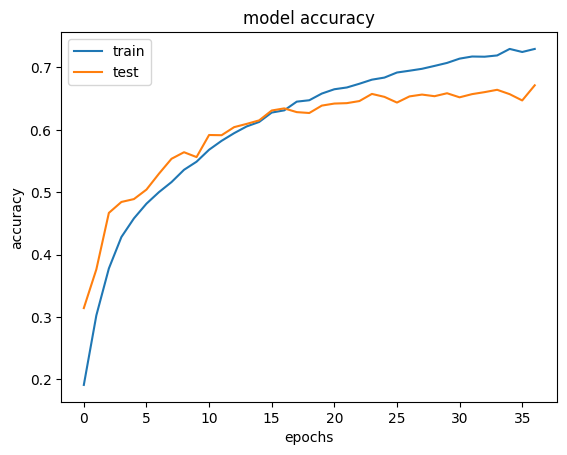

In [16]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [17]:
Y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [18]:
Y_pred[0]

array([5.5239193e-06, 3.1209680e-07, 2.3901232e-02, 4.0900815e-01,
       1.6785862e-03, 5.5876404e-01, 5.5411702e-04, 6.0862899e-03,
       8.1134465e-07, 9.9477825e-07], dtype=float32)

In [25]:
np.argmax(Y_pred[1])

8

In [20]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:5]

[5, 8, 8, 0, 6]

In [21]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

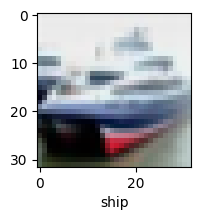

In [22]:
plot_samples(X_test, Y_test, 1)

In [23]:
classes[Y_classes[1]]

'ship'

Classification report

In [24]:
print("classification report: \n" , classification_report(Y_test, Y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.86      0.77      0.81      1000
           2       0.53      0.47      0.50      1000
           3       0.40      0.45      0.42      1000
           4       0.63      0.60      0.61      1000
           5       0.62      0.52      0.57      1000
           6       0.69      0.81      0.74      1000
           7       0.75      0.69      0.72      1000
           8       0.78      0.80      0.79      1000
           9       0.71      0.80      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

